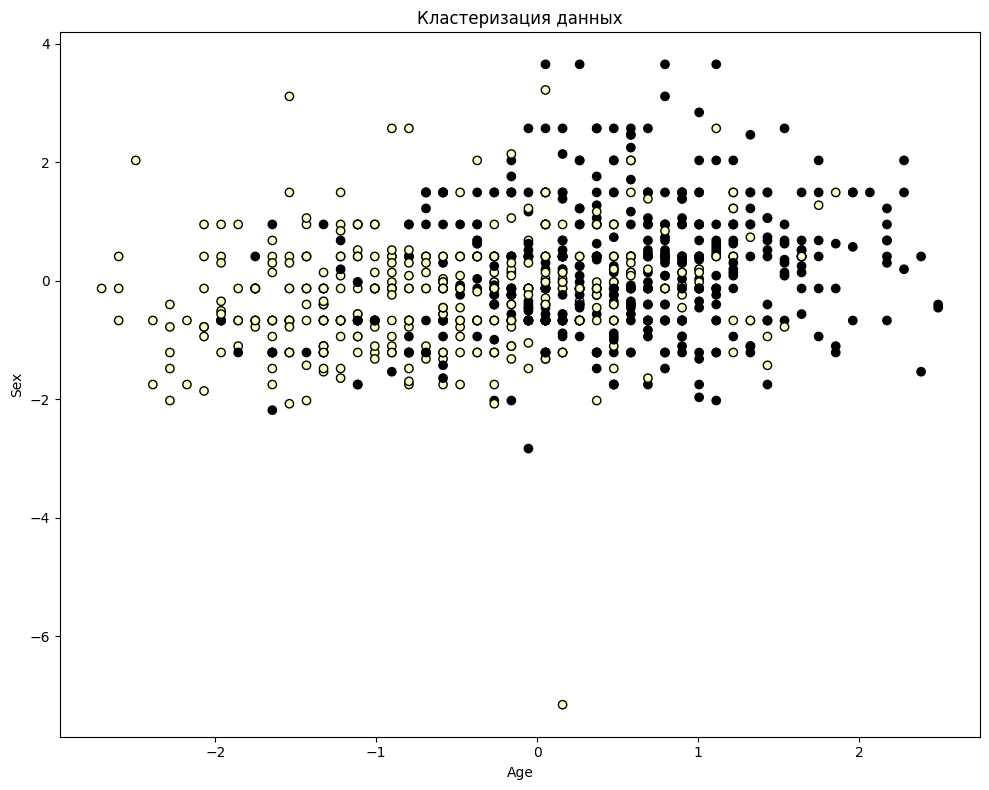

Silhouette Score: 0.17366757654979176
Davies-Bouldin Index: 2.0356026267561838
Calinski-Harabasz Index: 204.46120018625814
Adjusted Rand Index: 0.393028475320712
Homogeneity: 0.30821819353216307
Completeness: 0.3060989264876336
V-Measure: 0.3071549044933421

Adjusted Rand Score: 0.393028475320712
Adjusted Mutual Info Score: 0.30660650645263454


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score, adjusted_mutual_info_score,
    silhouette_score, davies_bouldin_score,
    calinski_harabasz_score, homogeneity_score,
    completeness_score, v_measure_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Чтение данных
df = pd.read_csv('./heart.csv')

# Выбор признаков
features_to_use = [
    'Age',
    'Sex',
    'ChestPainType',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'RestingECG',
    'MaxHR',
    'ExerciseAngina',
    'Oldpeak',
    'ST_Slope'
]

y = df['HeartDisease']

# Преобразуем категориальные признаки с помощью OneHotEncoder
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = [col for col in features_to_use if col not in categorical_features]

# Преобразование данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Применение преобразования
X = df[features_to_use]

# Применяем обработку данных с учетом категориальных и числовых признаков
X_processed = preprocessor.fit_transform(X)

# Заполнение пропусков (если есть)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_processed)

# Кластеризация с KMeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_imputed)

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=km.labels_, cmap='magma', edgecolor='k')
plt.title("Кластеризация данных")
plt.xlabel(features_to_use[0])
plt.ylabel(features_to_use[1])
plt.tight_layout()
plt.show()

# Оценка кластеризации
silhouette_avg = silhouette_score(X_imputed, km.labels_)
davies_bouldin = davies_bouldin_score(X_imputed, km.labels_)
calinski_harabasz = calinski_harabasz_score(X_imputed, km.labels_)

# Преобразуем y в бинарный формат для сравнения
y_binary = (y == 1).astype(int)

# Оценки кластеризации по меткам
adjusted_rand = adjusted_rand_score(y_binary, km.labels_)
homogeneity = homogeneity_score(y_binary, km.labels_)
completeness = completeness_score(y_binary, km.labels_)
v_measure = v_measure_score(y_binary, km.labels_)

# Вывод метрик
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Adjusted Rand Index: {adjusted_rand}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')
print("")

# Дополнительные метрики
print(f"Adjusted Rand Score: {adjusted_rand_score(km.labels_, y_binary)}")
print(f"Adjusted Mutual Info Score: {adjusted_mutual_info_score(km.labels_, y_binary)}")



Количество кластеров: 2
Silhouette Score: 0.17366757654979176
Davies-Bouldin Index: 2.0356026267561838
Calinski-Harabasz Index: 204.46120018625814
Adjusted Rand Index: 0.393028475320712
Homogeneity: 0.30821819353216307
Completeness: 0.3060989264876336
V-Measure: 0.3071549044933421

Количество кластеров: 3
Silhouette Score: 0.1765199801452763
Davies-Bouldin Index: 1.9882303083133888
Calinski-Harabasz Index: 172.31820828259393
Adjusted Rand Index: 0.28953896630872555
Homogeneity: 0.33238321781337826
Completeness: 0.21352718940264329
V-Measure: 0.26001649122696674

Количество кластеров: 4
Silhouette Score: 0.12542535642865357
Davies-Bouldin Index: 2.228348149887416
Calinski-Harabasz Index: 139.6986454814319
Adjusted Rand Index: 0.23604120450248411
Homogeneity: 0.37797120967056536
Completeness: 0.1888617094822439
V-Measure: 0.25187065317288154

Количество кластеров: 5
Silhouette Score: 0.12934312271299156
Davies-Bouldin Index: 2.043629353511255
Calinski-Harabasz Index: 132.46508557726838


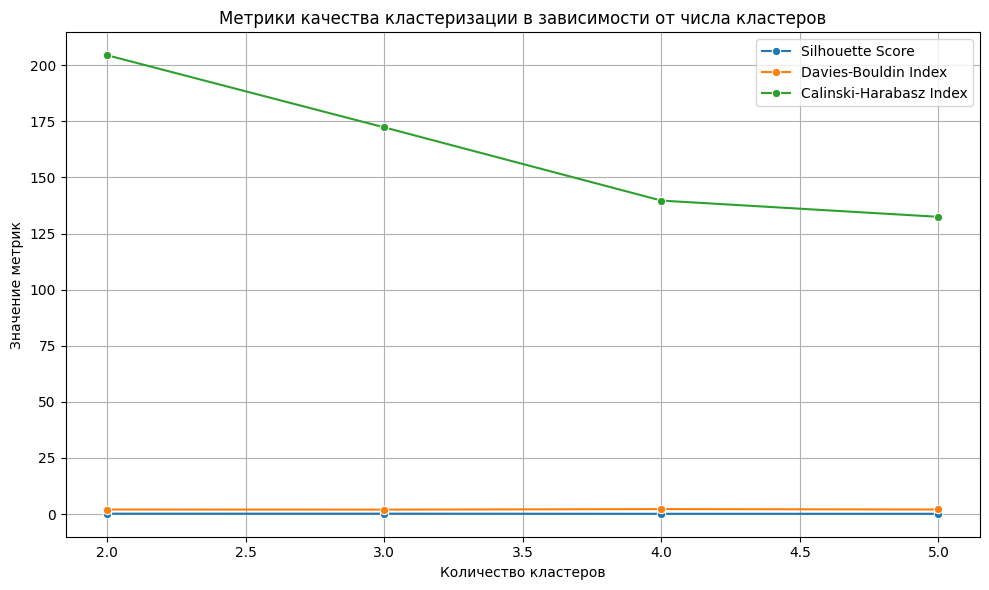

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             calinski_harabasz_score, adjusted_rand_score,
                             homogeneity_score, completeness_score, v_measure_score)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv('./heart.csv')

# Признаки для кластеризации
features_to_use = [
    'Age',
    'Sex',
    'ChestPainType',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'RestingECG',
    'MaxHR',
    'ExerciseAngina',
    'Oldpeak',
    'ST_Slope'
]

# Целевая переменная
y = df['HeartDisease']  # 1 - заболевание, 0 - без заболевания

# Преобразуем целевую переменную в бинарный формат для сравнения
y_binary = (y == 1).astype(int)

# Преобразование категориальных признаков
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = [col for col in features_to_use if col not in categorical_features]

# Преобразование данных с учетом категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Применение преобразования
X = df[features_to_use]
X_processed = preprocessor.fit_transform(X)

# Словарь для хранения метрик
metrics = {
    'n_clusters': [],
    'silhouette_score': [],
    'davies_bouldin': [],
    'calinski_harabasz': [],
    'adjusted_rand': [],
    'homogeneity': [],
    'completeness': [],
    'v_measure': []
}

# Пробуем разные значения количества кластеров
for n_clusters in range(2, 6):  # Пробуем от 2 до 5 кластеров
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_processed)

    # Оценка качества кластеризации
    silhouette_avg = silhouette_score(X_processed, clusters)
    davies_bouldin = davies_bouldin_score(X_processed, clusters)
    calinski_harabasz = calinski_harabasz_score(X_processed, clusters)
    adjusted_rand = adjusted_rand_score(y_binary, clusters)
    homogeneity = homogeneity_score(y_binary, clusters)
    completeness = completeness_score(y_binary, clusters)
    v_measure = v_measure_score(y_binary, clusters)

    # Сохраняем метрики
    metrics['n_clusters'].append(n_clusters)
    metrics['silhouette_score'].append(silhouette_avg)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski_harabasz)
    metrics['adjusted_rand'].append(adjusted_rand)
    metrics['homogeneity'].append(homogeneity)
    metrics['completeness'].append(completeness)
    metrics['v_measure'].append(v_measure)

    # Выводим метрики для текущего числа кластеров
    print(f'\nКоличество кластеров: {n_clusters}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {davies_bouldin}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz}')
    print(f'Adjusted Rand Index: {adjusted_rand}')
    print(f'Homogeneity: {homogeneity}')
    print(f'Completeness: {completeness}')
    print(f'V-Measure: {v_measure}')

# Создаем DataFrame для визуализации метрик
metrics_df = pd.DataFrame(metrics)

# Визуализация метрик
plt.figure(figsize=(10, 6))
sns.lineplot(x='n_clusters', y='silhouette_score', data=metrics_df, marker='o', label='Silhouette Score')
sns.lineplot(x='n_clusters', y='davies_bouldin', data=metrics_df, marker='o', label='Davies-Bouldin Index')
sns.lineplot(x='n_clusters', y='calinski_harabasz', data=metrics_df, marker='o', label='Calinski-Harabasz Index')
plt.title("Метрики качества кластеризации в зависимости от числа кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Значение метрик")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Загружаем данные
df = pd.read_csv('./heart.csv')

# Выбираем числовые признаки для кластеризации
features_to_use = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'
]

# Целевая переменная (HeartDisease)
y = df['HeartDisease']  # 0 - без болезни, 1 - с болезнью

# Преобразуем целевую переменную в бинарный формат (0 - 'no disease', 1 - 'disease')
y_binary = y

# Выбираем признаки для кластеризации
X = df[features_to_use]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Параметры для DBSCAN
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samples_values = [1, 2, 3, 4, 5, 6, 7, 9]

# Список для хранения результатов
results = []

# Пробуем различные параметры DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Testing DBSCAN with eps={eps}, min_samples={min_samples}")

        # Применяем DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        # Вычисляем Silhouette Score
        if len(set(clusters)) > 1:  # Если есть хотя бы 2 кластера
            silhouette_avg = silhouette_score(X_scaled, clusters)
            print(f'Silhouette Score: {silhouette_avg:.4f}')
        else:
            print("No clusters found!")

        # Вычисляем ARI (Adjusted Rand Index)
        if len(set(clusters)) > 1 and len(set(clusters) - {-1}) > 0:
            ari_score = adjusted_rand_score(y_binary, clusters)
            print(f'Adjusted Rand Index: {ari_score:.4f}')
            results.append((eps, min_samples, ari_score, silhouette_avg))
        else:
            print("No valid clusters found!")

        print("-" * 40)  # Разделитель между результатами

# Сортируем результаты по ARI
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

# Выводим отсортированные результаты
print("\nSorted results by Adjusted Rand Index:")
for eps, min_samples, ari_score, silhouette_avg in sorted_results:
    print(f"eps={eps}, min_samples={min_samples}, ARI={ari_score:.4f}, Silhouette={silhouette_avg:.4f}")


Testing DBSCAN with eps=0.1, min_samples=1
Silhouette Score: 0.0078
Adjusted Rand Index: 0.0000
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=2
Silhouette Score: -0.3666
Adjusted Rand Index: 0.0023
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=3
No clusters found!
No valid clusters found!
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=4
No clusters found!
No valid clusters found!
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=5
No clusters found!
No valid clusters found!
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=6
No clusters found!
No valid clusters found!
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=7
No clusters found!
No valid clusters found!
----------------------------------------
Testing DBSCAN with eps=0.1, min_samples=9
No clusters found!
No valid clusters found


Best parameters: eps=0.7, min_samples=7


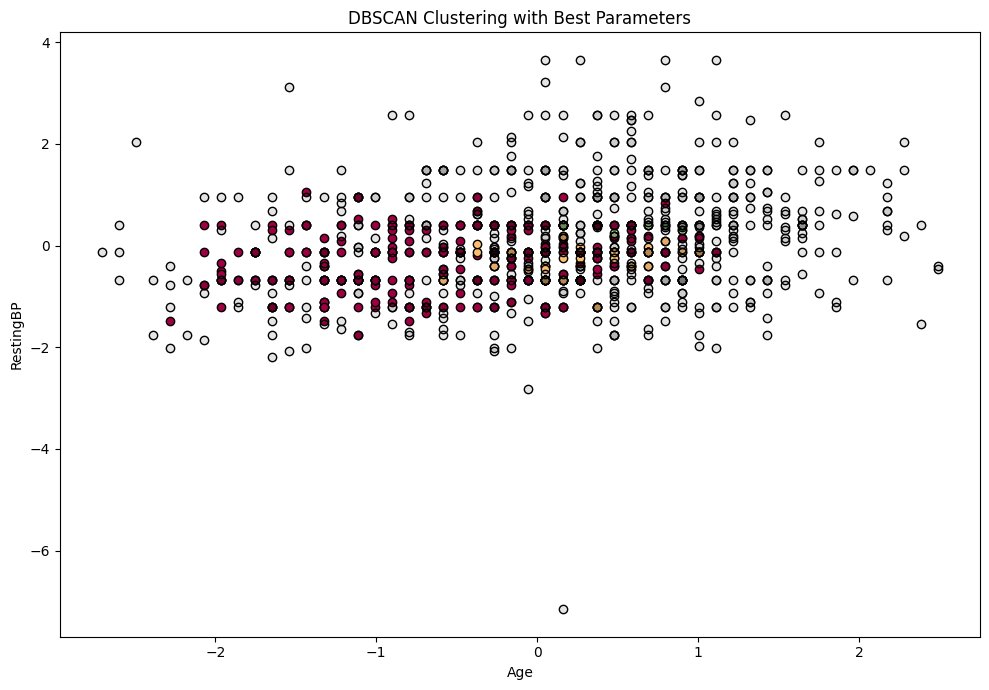

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Извлекаем лучшие параметры из сортированных результатов
best_params = sorted_results[0]
print(f"\nBest parameters: eps={best_params[0]}, min_samples={best_params[1]}")

# Применяем DBSCAN с лучшими параметрами
dbscan_best = DBSCAN(eps=best_params[0], min_samples=best_params[1])
clusters_best = dbscan_best.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 7))

unique_labels = set(clusters_best)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, .1]

    class_member_mask = (clusters_best == k)
    xy = X_scaled[class_member_mask & ~np.isnan(X_scaled).any(axis=1)]
    
    # Отображаем точки кластеров
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title('DBSCAN Clustering with Best Parameters')
plt.xlabel(features_to_use[0])  # Первый выбранный признак для оси X
plt.ylabel(features_to_use[1])  # Второй выбранный признак для оси Y

# Подгоняем отображение для лучшего вида
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

# Загружаем данные
df = pd.read_csv('./heart.csv')

# Выбираем признаки для кластеризации
features_to_use = [
    'Age',
    'RestingBP',
    'Cholesterol'
]

# Целевая переменная
y = df['HeartDisease']  # 0 = отсутствие болезни, 1 = наличие болезни

# Преобразуем целевую переменную в бинарную (0 = отсутствие болезни, 1 = наличие болезни)
y_binary = y.astype(int)

# Выбираем признаки для кластеризации
X = df[features_to_use]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Выводим количество элементов в каждом кластере
unique_clusters, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Кластер: {cluster}, Количество элементов в кластере: {count}")

# Рассчитываем Silhouette Score
if len(set(clusters)) > 1:  # Проверяем, что кластеров больше 1
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print("No clusters found!")

# Рассчитываем ARI для кластеров, исключая шум (класс -1)
valid_clusters = [cluster for cluster in clusters if cluster != -1]
valid_y = [y_binary[i] for i in range(len(y_binary)) if clusters[i] != -1]

if len(set(valid_clusters)) > 1:  # Проверяем, что кластеров больше 1, исключая шум
    ari_score = adjusted_rand_score(valid_y, valid_clusters)
    print(f'Adjusted Rand Index: {ari_score:.4f}')
else:
    print("No valid clusters found!")


Кластер: -1, Количество элементов в кластере: 918
No clusters found!
No valid clusters found!


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

# Загружаем данные
df = pd.read_csv('./heart.csv')

# Выбираем признаки для кластеризации
features_to_use = [
    'RestingBP', 
    'Cholesterol', 
    'MaxHR', 
    'Oldpeak'
]

# Целевая переменная (HeartDisease)
y = df['HeartDisease']  # 0 — нет болезни, 1 — есть болезнь

# Преобразуем целевую переменную в бинарную форму (0 и 1)
y_binary = y.astype(int)

# Извлекаем признаки для кластеризации
X = df[features_to_use]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация с использованием DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps для классификации соседей
clusters = dbscan.fit_predict(X_scaled)

# Выводим количество объектов в каждом кластере
unique_clusters, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Кластер: {cluster}, Количество объектов в кластере: {count}")

# Оценка качества кластеризации
if len(set(clusters)) > 1:  # Проверяем, что найдено больше одного кластера
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print("No clusters found!")

# Расчет ARI (Adjusted Rand Index)
valid_clusters = [cluster for cluster in clusters if cluster != -1]  # Убираем шум
valid_y = [y_binary[i] for i in range(len(y_binary)) if clusters[i] != -1]  # Соответствующие метки

if len(set(valid_clusters)) > 1:  # Проверяем, что есть более одного кластера
    ari_score = adjusted_rand_score(valid_y, valid_clusters)
    print(f'Adjusted Rand Index: {ari_score:.4f}')
else:
    print("No valid clusters found!")


Кластер: -1, Количество объектов в кластере: 720
Кластер: 0, Количество объектов в кластере: 110
Кластер: 1, Количество объектов в кластере: 5
Кластер: 2, Количество объектов в кластере: 5
Кластер: 3, Количество объектов в кластере: 17
Кластер: 4, Количество объектов в кластере: 9
Кластер: 5, Количество объектов в кластере: 5
Кластер: 6, Количество объектов в кластере: 5
Кластер: 7, Количество объектов в кластере: 7
Кластер: 8, Количество объектов в кластере: 12
Кластер: 9, Количество объектов в кластере: 9
Кластер: 10, Количество объектов в кластере: 6
Кластер: 11, Количество объектов в кластере: 3
Кластер: 12, Количество объектов в кластере: 5
Silhouette Score: -0.3888
Adjusted Rand Index: 0.2764
